In [5]:
from matplotlib import pyplot as plt
%matplotlib notebook
import struct
import math

In [11]:
def plot_data(offx=0, end=-1, signed=False, channels=1):
    with open('/tmp/scope_dump.bin', 'rb') as f:
        raw_data = f.read()
        data = struct.unpack(f'<{len(raw_data)//2}{"h" if signed else "H"}', raw_data)
    
    fig, axs = plt.subplots(channels, 1, squeeze=False, sharex=True, figsize=(10, 5))
    for i, ax in enumerate(axs.flatten()):
        ax.plot([math.nan if x==-255 else x for x in data[offx:][:end][i::channels]])
        ax.grid()
    
    return data

<IPython.core.display.Javascript object>


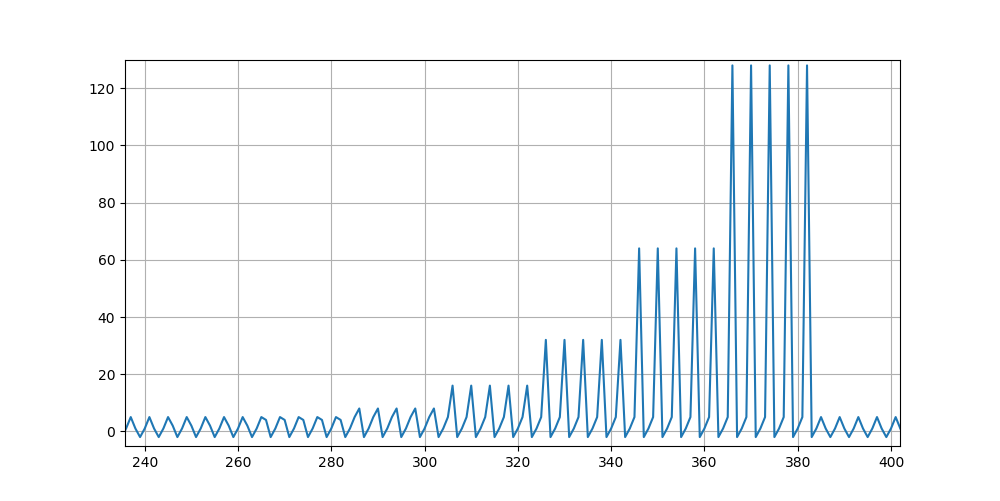

In [47]:
    data = plot_data(offx=4, signed=True, channels=1)
#print(''.join(str(x) for x in data[4:][3::4]))